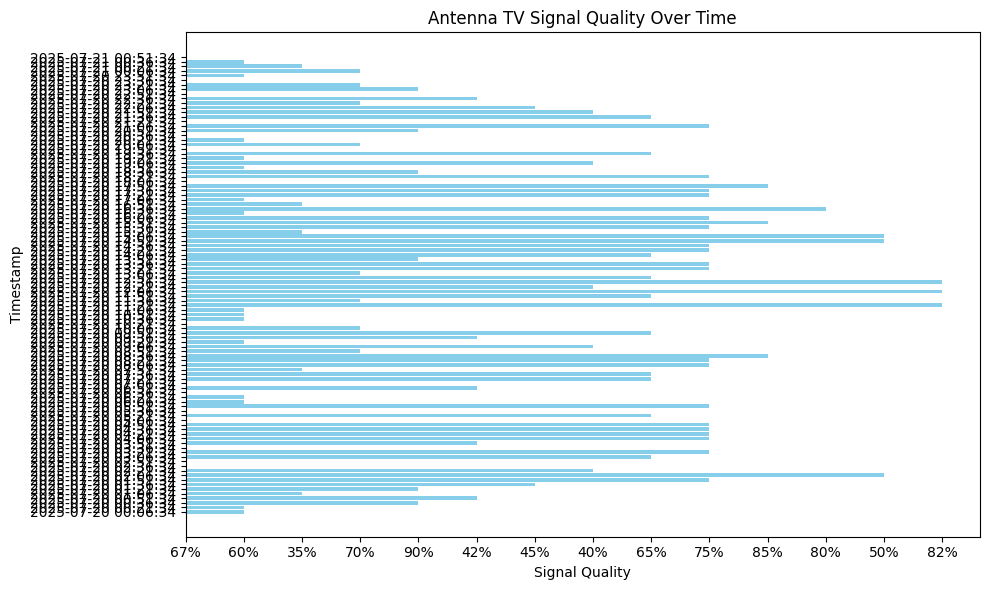

In [1]:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt


def random_location():
    return random.choice(['90210', '10001', '30301', '60601', '94105'])

def random_antenna_type():
    return random.choice(['Yagi', 'Omni-directional', 'Log-periodic', 'Panel', 'Dipole'])

def random_throttle_type():
    return random.choice(['AGC', 'Manual Attenuator', 'Motorized Rotator', 'Digital Gain Control'])

def random_weather():
    return random.choice(['Clear', 'Cloudy', 'Rainy', 'Windy', 'Stormy'])

def reception_quality(signal_strength, weather):
    # Simplified quality logic
    if signal_strength > -60:
        base = 90
    elif signal_strength > -70:
        base = 75
    else:
        base = 50
    noise_penalty = {'Clear': 0, 'Cloudy': -5, 'Rainy': -10, 'Windy': -8, 'Stormy': -15}
    return max(0, min(100, base + noise_penalty[weather]))


n_rows = 100
start_time = datetime.now()
data = []

for i in range(n_rows):
    timestamp = start_time - timedelta(minutes=15 * i)
    antenna_type = random_antenna_type()
    location = random_location()
    throttle_type = random_throttle_type()
    throttle_level = random.randint(0, 100)  # As % or rotation angle
    signal_strength = round(np.random.normal(-65, 5), 2)  # dBm
    frequency = random.choice([177, 213, 473, 563, 615])  # MHz
    weather = random_weather()
    signal_quality = reception_quality(signal_strength, weather)
    result = 'Clean' if signal_quality >= 80 else ('Pixelated' if signal_quality >= 60 else 'Dropout')
    voltage = round(random.uniform(4.5, 5.5), 2)  # volts

    data.append([
        timestamp.strftime("%Y-%m-%d %H:%M:%S"),
        antenna_type,
        location,
        throttle_type,
        f"{throttle_level}%",
        f"{signal_strength} dBm",
        f"{signal_quality}%",
        f"{frequency} MHz",
        weather,
        result,
        f"{voltage} V"
    ])


columns = [
    "Timestamp", "Antenna Type", "Location", "Throttle Type", "Throttle Level",
    "Signal Strength", "Signal Quality", "Channel Frequency",
    "Weather Conditions", "Reception Result", "Power Supply Voltage"
]

df = pd.DataFrame(data, columns=columns)


df.head(10)


plt.figure(figsize=(10, 6))
plt.barh(df['Timestamp'], df['Signal Quality'], color='skyblue')
plt.xlabel('Signal Quality')
plt.ylabel('Timestamp')
plt.title('Antenna TV Signal Quality Over Time')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()